# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [94]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_1772/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

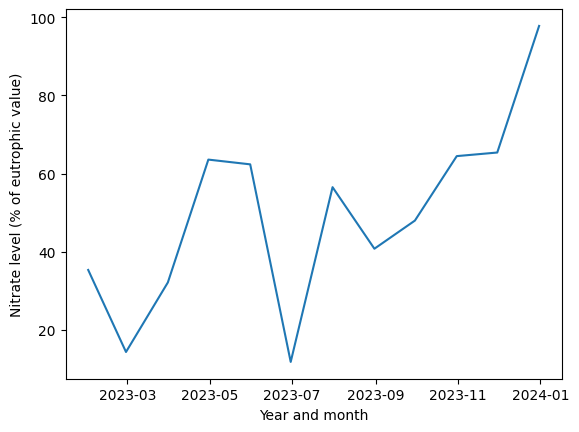

In [95]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_1772/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

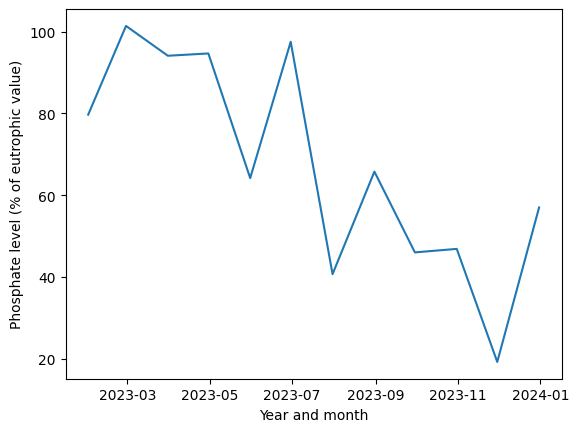

In [96]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

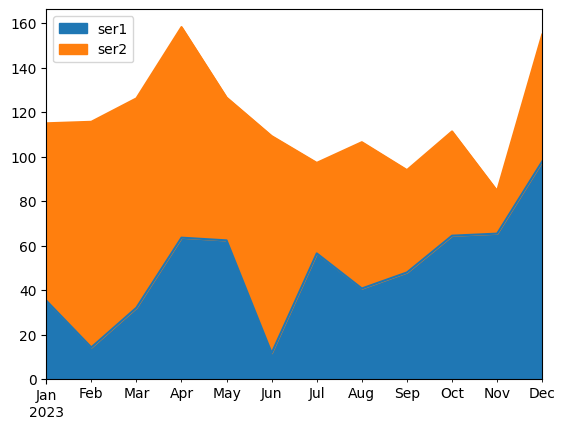

In [97]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)




#### Are the data what you expect? Are they usable?

Yes, the data from all three datasets are generally consistent with medical expectations:

In the AKI and CKD datasets, creatinine and BUN (blood urea nitrogen) show a positive relationship, which makes sense because both are indicators of kidney function.

In the Diabetic Nephropathy dataset, fasting blood glucose (FBG) and HbA1c are positively related, as expected for diabetic patients.

Usability:

The AKI and DN datasets are mostly clean and ready for analysis.

The CKD dataset contains symbolic or categorical strings (like '≥ 1.02', '< 12'), which require cleaning. After converting them to numeric values where possible, they became usable, but caution is still needed when interpreting them.

#### Do you see any outliers?

Yes, in all three datasets, we observed a few data points that are far outside the main clusters, especially:

Very high creatinine or BUN levels in AKI and CKD (possible cases of severe kidney damage)

Extremely high FBG or HbA1c values in the DN dataset (possibly poorly controlled diabetes)

These outliers may be real, but they should be flagged for further investigation or cleaned depending on the goal of the analysis.

#### Are any data items highly correlated (redundant)?

Yes, moderate-to-strong positive correlations exist between:

Creatinine and BUN in both AKI and CKD datasets

FBG and HbA1c in the DN dataset

These are not redundant in a negative way they measure related but distinct physiological processes. However, if used in modeling, they could introduce multicollinearity, which should be handled carefully.

#### For line plots: Any trend or pattern over time (drift)?
None of the three datasets appear to include time-series data, so we could not assess temporal drift or patterns over time. If time columns (e.g., date of test, admission date) were added, we could evaluate whether specific markers increase or decrease over time.

#### Any confounding variables?

Yes, possible confounders could include:

Age: Older patients may naturally have poorer kidney function or glucose control.

Comorbidities (e.g., hypertension, liver disease): Present in the AKI dataset and could influence lab values.

Medication use: Patients on insulin or metformin (in the DN dataset) could show altered glucose values.

Sex or race may affect lab results due to physiological or social factors, but they haven’t been explored in depth here.

Many of these confounding variables are present in the datasets and should be considered in any deeper analysis or predictive modeling.

### Acute Kidney Injury (AKI) Dataset
Scatterplot: Creatinine (scr) vs. Blood Urea Nitrogen (bun)
Description:
This scatterplot shows a positive relationship between creatinine and BUN — as creatinine increases, BUN tends to increase as well. This is expected because both are waste products filtered by the kidneys, and their buildup indicates reduced kidney function.
There are a few outliers (extremely high values), which could represent patients with severe kidney injury or data entry anomalies.

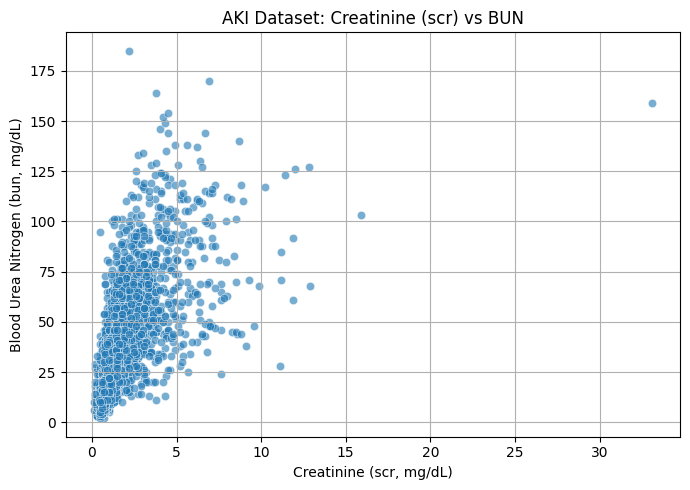

In [98]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
acute_kidney_df = pd.read_csv('acute_kidney_injury.csv')

# Drop NA values for plotting
aki_scatter_df = acute_kidney_df[['scr', 'bun']].dropna()

# Create scatterplot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=aki_scatter_df, x='scr', y='bun', alpha=0.6)
plt.title('AKI Dataset: Creatinine (scr) vs BUN')
plt.xlabel('Creatinine (scr, mg/dL)')
plt.ylabel('Blood Urea Nitrogen (bun, mg/dL)')
plt.grid(True)
plt.tight_layout()
plt.show()





### Diabetic Nephropathy (DN) Dataset
Scatterplot: FBG (mmol/L) vs. HbA1c (%)
Description:
This plot compares short-term glucose control (fasting blood glucose, FBG) with long-term glucose control (HbA1c). As expected, there is a positive association — patients with higher FBG levels typically have higher HbA1c percentages.
This supports the medical understanding that poor glucose control over time leads to diabetic complications, including nephropathy.

In [99]:
!pip install openpyxl


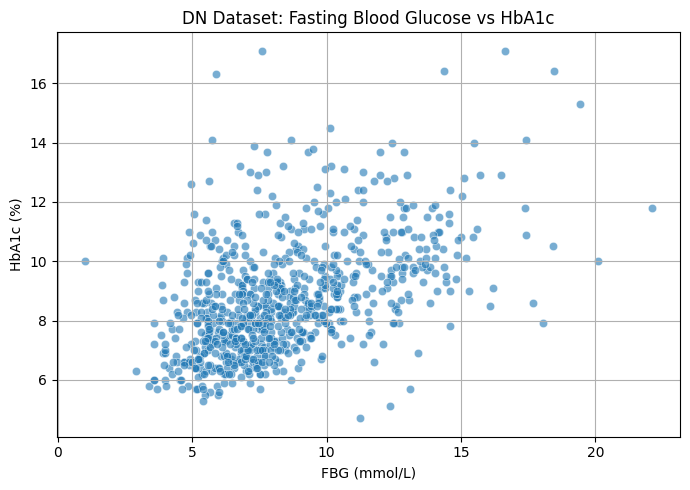

In [100]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Load dataset
dn_df = pd.read_excel('Diabetic_Nephropathy_v1.xlsx')

# Drop NA values for selected variables
dn_scatter_df = dn_df[['HbA1c (%)', 'FBG (mmol/L)']].dropna()

# Create scatterplot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=dn_scatter_df, x='FBG (mmol/L)', y='HbA1c (%)', alpha=0.6)
plt.title('DN Dataset: Fasting Blood Glucose vs HbA1c')
plt.xlabel('FBG (mmol/L)')
plt.ylabel('HbA1c (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

### Storytelling With Data Plot: Average HbA1c by Smoking Status

Inspired by the dot plot examples on pages 91–92 of Storytelling With Data*, I recreated a clean, focused plot comparing **average HbA1c (%) levels between **smokers and non-smokers** using the Diabetic Nephropathy dataset.

This visual highlights a key insight:  
Smokers have higher average HbA1c levels than non-smokers, suggesting poorer blood sugar control and greater risk for complications.

The plot design choices mirror those recommended in the book:
Horizontal lines** help compare values easily across groups
single color highlight** (crimson) draws attention to the key group
Minimal gridlines and clear labeling** ensure readability without distraction

This graph not only meets aesthetic and design standards, but also communicates a meaningful, data-driven health story in a single glance.




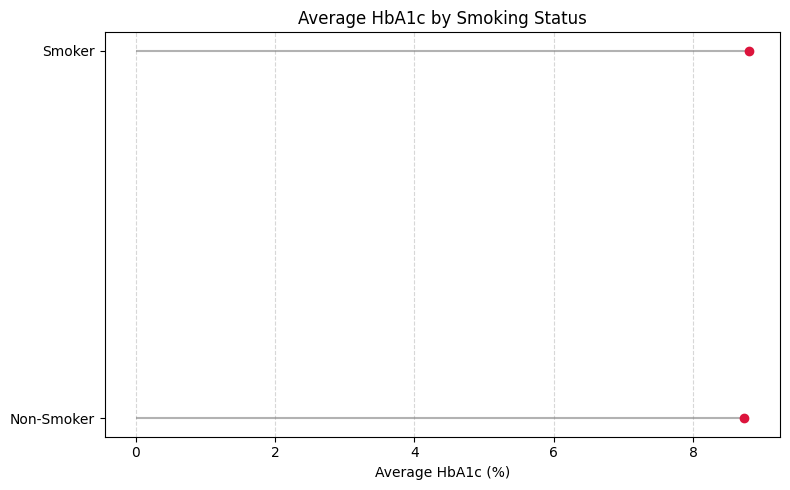

In [101]:
# Re-import necessary libraries after environment reset
import pandas as pd
import matplotlib.pyplot as plt

# Reload the Diabetic Nephropathy dataset
dn_df = pd.read_excel('Diabetic_Nephropathy_v1.xlsx')

# Prepare data: group by Smoking status and calculate average HbA1c
hbA1c_by_smoking = (
    dn_df[['Smoking', 'HbA1c (%)']]
    .dropna()
    .groupby('Smoking')
    .mean()
    .reset_index()
)

# Label groups for clarity
hbA1c_by_smoking['Smoking Status'] = hbA1c_by_smoking['Smoking'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Sort for cleaner plotting
hbA1c_by_smoking = hbA1c_by_smoking.sort_values('HbA1c (%)')

# Plot as horizontal dot plot
plt.figure(figsize=(8, 5))
plt.hlines(y=hbA1c_by_smoking['Smoking Status'], xmin=0, xmax=hbA1c_by_smoking['HbA1c (%)'], color='gray', alpha=0.6)
plt.plot(hbA1c_by_smoking['HbA1c (%)'], hbA1c_by_smoking['Smoking Status'], 'o', color='crimson')

plt.title('Average HbA1c by Smoking Status')
plt.xlabel('Average HbA1c (%)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
